In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
##dependent and independent features
X=df.drop("FWI",axis=1)
Y=df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Regions
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
##Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [14]:
##Feature selection on the basis of correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Regions
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

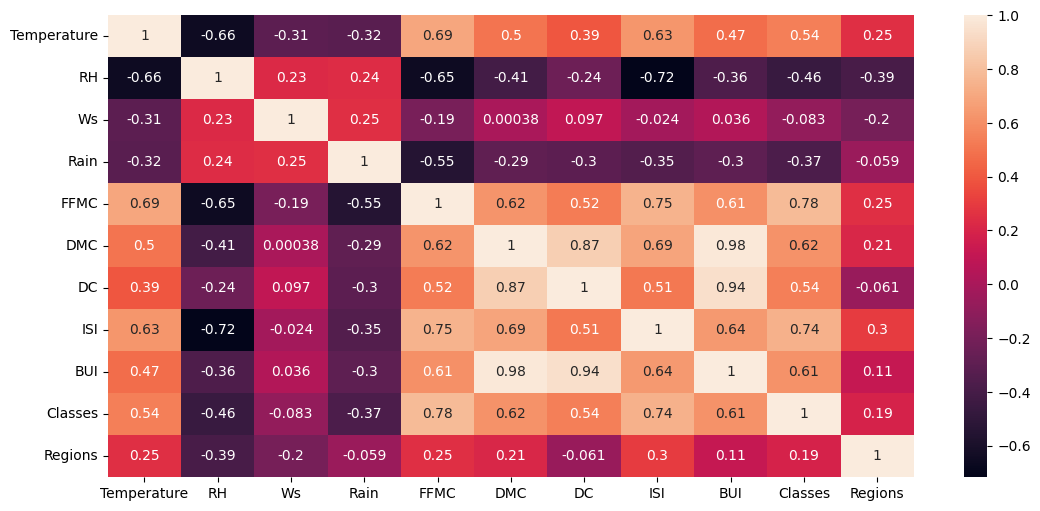

In [15]:
#Check for multicollinearity
plt.figure(figsize=(13,6))
sns.heatmap(X_train.corr(),annot=True)

In [16]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [17]:
## The threshold value is set up by the domain expertise only
correlation(X_train,0.85)

{'BUI', 'DC'}

In [18]:
X_train.drop(['BUI', 'DC'],axis=1,inplace=True)
X_test.drop(['BUI', 'DC'],axis=1,inplace=True)

In [19]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [20]:
##Standardization process
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

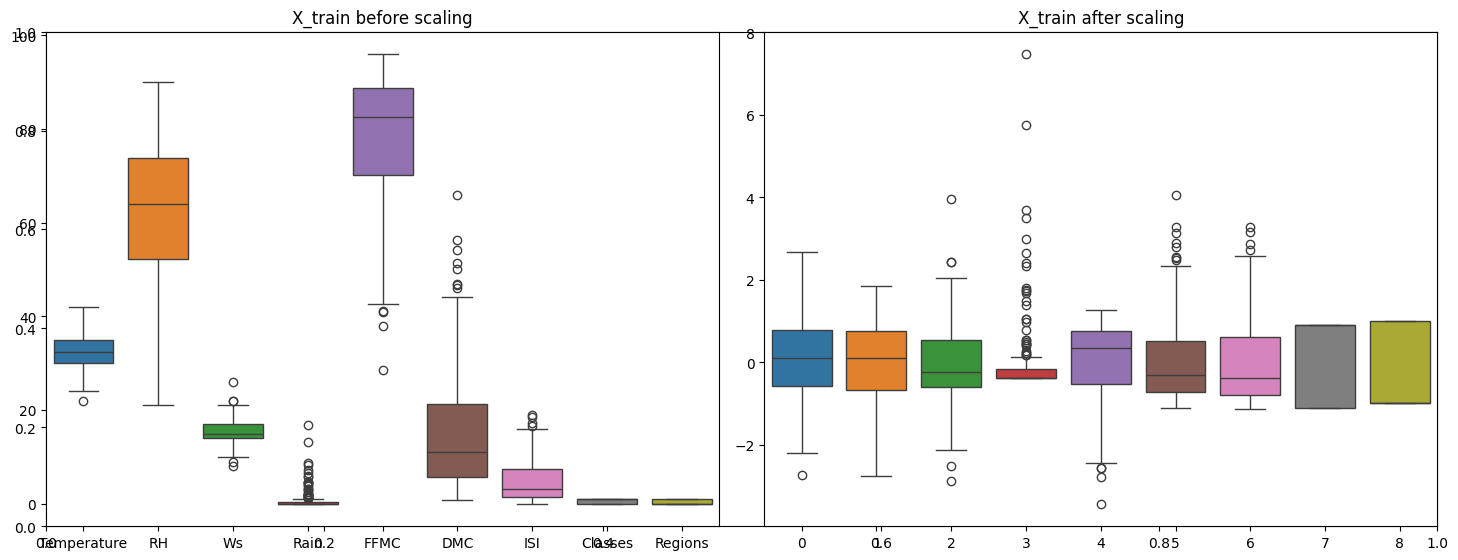

In [22]:
##Plot box plots for sees the outliers
plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")
plt.tight_layout()  # Add this line
plt.show()

## Model Selection

Mean-absolute-error 0.5468236465249978
R2-score 0.9847657384266951


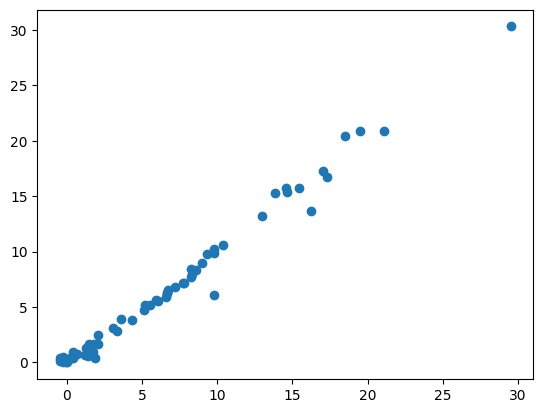

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linearreg=LinearRegression()
linearreg.fit(X_train_scaled,Y_train)
Y_pred=linearreg.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

## Lasso Regression


Mean-absolute-error 1.133175994914409
R2-score 0.9492020263112388


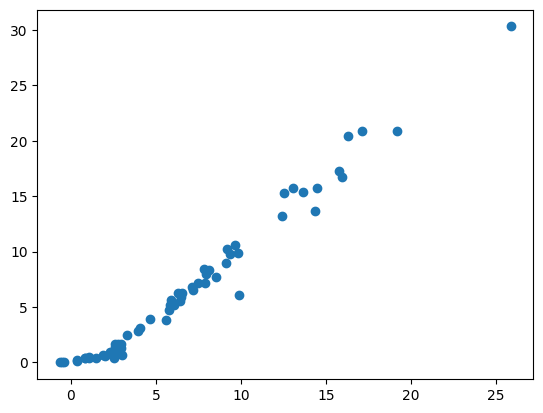

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Las=Lasso()
Las.fit(X_train_scaled,Y_train)
Y_pred=Las.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

Mean-absolute-error 0.619970115826343
R2-score 0.9820946715928275


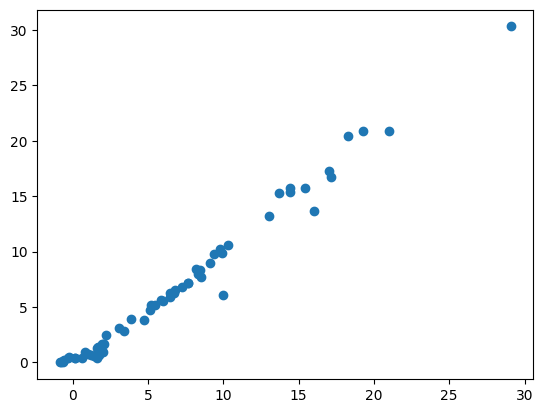

In [36]:
##LassoCV regression
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Las=LassoCV(cv=5)
Las.fit(X_train_scaled,Y_train)
Y_pred=Las.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

## Ridge regression

Mean-absolute-error 0.5642305340105715
R2-score 0.9842993364555512


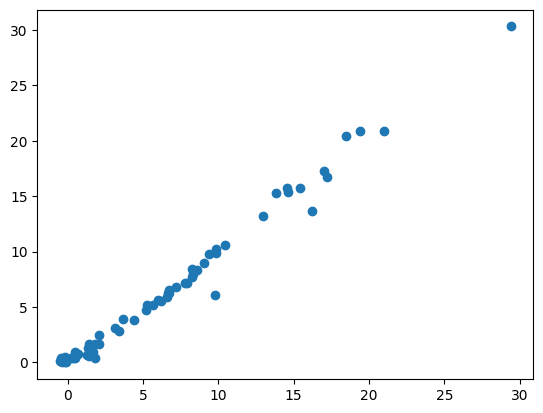

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

Mean-absolute-error 0.5642305340105715
R2-score 0.9842993364555512


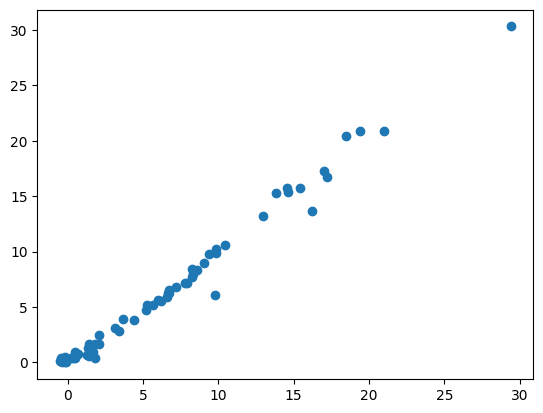

In [29]:
##RidgeCV regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridgecv=RidgeCV(cv=5)
Ridgecv.fit(X_train_scaled,Y_train)
Y_pred=Ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

In [30]:
Ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## Elastic Net regression 

Mean-absolute-error 1.8822353634896005
R2-score 0.8753460589519703


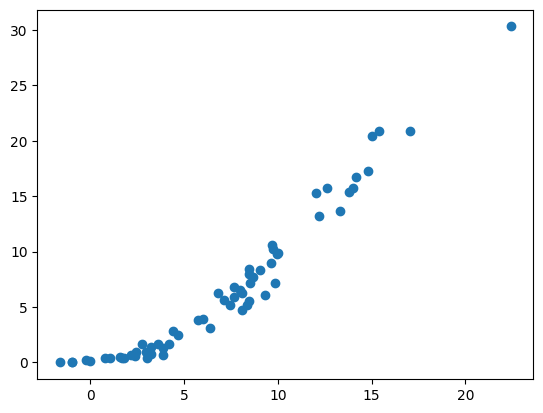

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Las=ElasticNet()
Las.fit(X_train_scaled,Y_train)
Y_pred=Las.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

Mean-absolute-error 0.6575946731430898
R2-score 0.9814217587854941


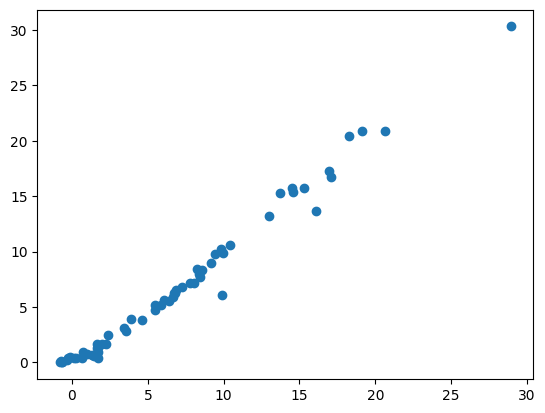

In [32]:
##ElasticnetCV regression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Las=ElasticNetCV(cv=5)
Las.fit(X_train_scaled,Y_train)
Y_pred=Las.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean-absolute-error",mae)
print("R2-score",score)
plt.scatter(Y_pred,Y_test)

In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [40]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None
